# **KELOMPOK 5 - C2 - Tugas Deep Learning**

DATA MINING

FIKRY IDHAM DWIYANA (2101294)



WILDAN HAFIZH RAFFIANSHAR (2202301)



ADRIAN MULIANTO (2200939)



RATU SYAHIRAH KHAIRUNNISA (2200978)



TALITHA FAYARINA ADHIGUNAWAN (2201271)


###**Domain :**

###**DETEKSI PENGENDARA MOTOR TANPA MENGGUNAKAN HELM**



Pada tugas ini kami mengumpulkan foto pengendara yang menggunakan helm dan tidak menggunakan helm menjadi sebuah dataset. Selanjutnya kami membuat sebuah model dari dataset tersebut. Tujuan model yang kami buat adalah untuk memprediksi sebuah foto apakah pengendara tersebut menggunakan helm atau tidak.

Foto yang digunakan, yaitu :

1. Pengendara motor memakai helm
2. Pengendara motor tidak memakai helm

Dataset yang kami kumpulkan berasal dari Google image, Google Street View, Freepik, CCTV lampu lalu lintas, dan Youtube.

## CNN (Convolutional Neural Network)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

###Mengambil Dataset dari Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/Dataset_Kelompok_5_Tugas_Deep_Learning/dataset_versi_baru'

###Memuat dataset menggunakan objek ImageDataGenerator dan flow_from_directory.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#1. Menentukan dimensi gambar dan ukuran batch
image_height, image_width = 180, 180
batch_size = 32

#2. Membuat objek ImageDataGenerator untuk augmentasi gambar jika diperlukan
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#3. Menggunakan flow_from_directory untuk membaca dataset dari direktori
training_images = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    subset = "training",
    class_mode='binary'  # Sesuaikan dengan jenis masalah klasifikasi yang Anda miliki
)

test_images = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    subset = "validation",
    class_mode='binary'  # Sesuaikan dengan jenis masalah klasifikasi yang Anda miliki
)


Found 496 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


Terdapat 2 kelas

###Melihat kelas-kelas dalam dataset

In [5]:
# Melihat kelas-kelas dalam dataset
print("Class Names:", training_images.class_indices)

Class Names: {'pengendara_pakai_helm': 0, 'pengendara_tidak_pakai_helm': 1}


2 kelas tersebut merupakan

0 untuk pengendara pakai helm

1 untuk pendara tidak pakai helm

###Mengecek bentuk (shape) dari batch pertama dari data pelatihan menggunakan generator training_images

In [6]:
for image_batch, labels_batch in training_images:
 print(image_batch.shape)
 print(labels_batch.shape)
 break


(32, 180, 180, 3)
(32,)


## Convolutional Neural Network

### Pembuatan Model menggunakan Keras

In [7]:
#Inisialisasi Model
model = Sequential([

 layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(image_height, image_width, 3)),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])


###Proses Kompilasi

In [8]:
from keras.losses import binary_crossentropy
model.compile(optimizer='adam',
             loss=tf.keras.losses.binary_crossentropy,
             metrics=['accuracy'])

###Menampilkan ringkasan (summary) dari arsitektur model yang telah didefinisikan.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 64)        0

###Pelatihan Model

In [10]:
epochs=10
history = model.fit(
 training_images,
 validation_data=test_images,
 epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 81s 4s/step - loss: 0.8212 - accuracy: 0.5141 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 9s 571ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 9s 530ms/step - loss: 0.6842 - accuracy: 0.5242 - val_loss: 0.7099 - val_accuracy: 0.4754
Epoch 4/10
16/16 [==============================] - 9s 582ms/step - loss: 0.6769 - accuracy: 0.6008 - val_loss: 0.7059 - val_accuracy: 0.3852
Epoch 5/10
16/16 [==============================] - 8s 505ms/step - loss: 0.6401 - accuracy: 0.6431 - val_loss: 0.8392 - val_accuracy: 0.4672
Epoch 6/10
16/16 [==============================] - 9s 603ms/step - loss: 0.5643 - accuracy: 0.7460 - val_loss: 0.8226 - val_accuracy: 0.4836
Epoch 7/10
16/16 [==============================] - 8s 502ms/step - loss: 0.4967 - accuracy: 0.7702 - val_loss: 1.1065 - val_accuracy: 0.4344
Epoch 8/

Pelatihan ini bertujuan untuk mengoptimalkan parameter model sehingga dapat memberikan prediksi yang baik pada data baru.

###Visualisasi dari metrik pelatihan (akurasi dan kerugian) selama berbagai epoch.

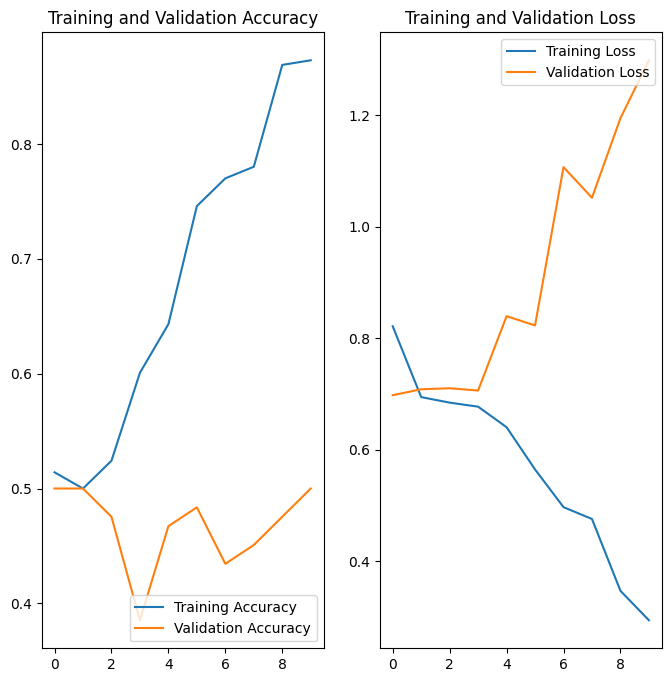

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


##CHECKER

Saving pake.png to pake.png
1/1 [==============================] - 0s 181ms/step




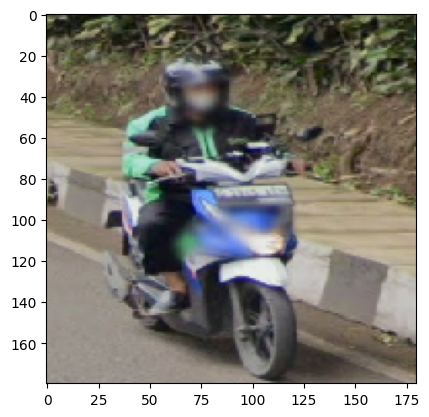

Foto ini berkemungkinan 95.49% pengendara_pakai_helm and 4.51% pengendara_tidak_pakai_helm.




In [12]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, image_width, image_height, 3])

  predict_proba = model.predict(im_input)[0]

  print('\n')
  plt.show()
  prediction_text = "Foto ini berkemungkinan {:.2f}% pengendara_pakai_helm and {:.2f}% pengendara_tidak_pakai_helm.".format(100 * predict_proba[0], 100 * (1 - predict_proba[0]))
  print(prediction_text)

  print('\n')

from google.colab import files
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(image_width,image_height))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

Hasil dari model diatas masih overfitting, dimana val loss meningkat dan val accuracy menurun, walau saat checker sudah benar

Untuk mengurangi overfitting, melakukan pembuatan model dengan menambah layer convolutional, melakukan data augmentasi dan menambah epoch dengan langkah yang sama seperti sebelumnya.

In [13]:
#1. Menentukan dimensi gambar dan ukuran batch
image_height, image_width = 180, 180
batch_size = 32

#2. Membuat objek ImageDataGenerator untuk augmentasi gambar jika diperlukan
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2, rotation_range=60)

#3. Menggunakan flow_from_directory untuk membaca dataset dari direktori
training_images = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    subset = "training",
    class_mode='binary'  # Sesuaikan dengan jenis masalah klasifikasi yang Anda miliki
)

test_images = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    subset = "validation",
    class_mode='binary'  # Sesuaikan dengan jenis masalah klasifikasi yang Anda miliki
)


Found 496 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [14]:
# Melihat kelas-kelas dalam dataset
print("Class Names:", training_images.class_indices)

Class Names: {'pengendara_pakai_helm': 0, 'pengendara_tidak_pakai_helm': 1}


In [15]:
# num_classes = len(training_labels)

#Inisialisasi Model
model = Sequential([

 layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(image_height, image_width, 3)),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])


In [16]:
from keras.losses import binary_crossentropy
model.compile(optimizer='adam',
             loss=tf.keras.losses.binary_crossentropy,
             metrics=['accuracy'])


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 64)       

In [18]:
epochs=15
history = model.fit(
 training_images,
 validation_data=test_images,
 epochs=epochs
)

Epoch 1/15
16/16 [==============================] - 16s 906ms/step - loss: 0.7073 - accuracy: 0.5403 - val_loss: 0.7108 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 14s 899ms/step - loss: 0.6947 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.4590
Epoch 3/15
16/16 [==============================] - 14s 895ms/step - loss: 0.6887 - accuracy: 0.5383 - val_loss: 0.7012 - val_accuracy: 0.4098
Epoch 4/15
16/16 [==============================] - 14s 884ms/step - loss: 0.6908 - accuracy: 0.5423 - val_loss: 0.6988 - val_accuracy: 0.4262
Epoch 5/15
16/16 [==============================] - 18s 1s/step - loss: 0.6783 - accuracy: 0.6008 - val_loss: 0.7516 - val_accuracy: 0.4836
Epoch 6/15
16/16 [==============================] - 14s 915ms/step - loss: 0.6908 - accuracy: 0.5383 - val_loss: 0.6969 - val_accuracy: 0.4590
Epoch 7/15
16/16 [==============================] - 14s 896ms/step - loss: 0.6889 - accuracy: 0.5766 - val_loss: 0.7003 - val_accuracy: 0.5000
Ep

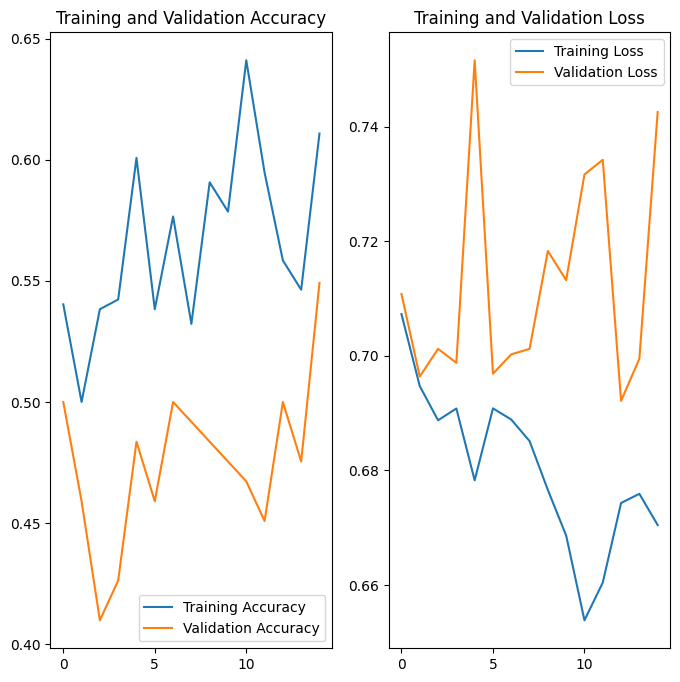

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Saving pake.png to pake (1).png
1/1 [==============================] - 0s 151ms/step




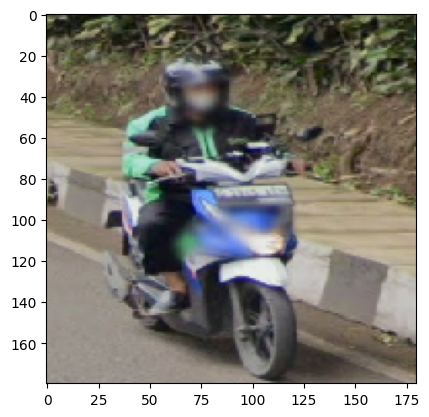

Foto ini berkemungkinan 41.37% pengendara_pakai_helm and 58.63% pengendara_tidak_pakai_helm.




In [20]:
def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, image_width, image_height, 3])

  predict_proba = model.predict(im_input)[0]

  print('\n')
  plt.show()
  prediction_text = "Foto ini berkemungkinan {:.2f}% pengendara_pakai_helm and {:.2f}% pengendara_tidak_pakai_helm.".format(100 * predict_proba[0], 100 * (1 - predict_proba[0]))
  print(prediction_text)
  print('\n')

from google.colab import files
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(image_width,image_height))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

Hasil dari model memiliki val loss yang lebih kecil dari sebelumnya, tetapi akurasinya juga ikut menurun dan pada prediksi juga kurang tepat.

Kemudian dilakukan uji coba kembali dengan menambah layer dropout dan menambah epoch.

In [21]:
#1. Menentukan dimensi gambar dan ukuran batch
image_height, image_width = 180, 180
batch_size = 32

#2. Membuat objek ImageDataGenerator untuk augmentasi gambar jika diperlukan
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2, rotation_range=60)
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

#3. Menggunakan flow_from_directory untuk membaca dataset dari direktori
training_images = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    subset = "training",
    class_mode='binary'  # Sesuaikan dengan jenis masalah klasifikasi yang Anda miliki
)

test_images = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    subset = "validation",
    class_mode='binary'  # Sesuaikan dengan jenis masalah klasifikasi yang Anda miliki
)


Found 496 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [22]:
# num_classes = len(training_labels)

#Inisialisasi Model
model = Sequential([

#  layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(image_height, image_width, 3)),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(1, activation='sigmoid')
])


In [23]:
from keras.losses import binary_crossentropy
model.compile(optimizer='adam',
             loss=tf.keras.losses.binary_crossentropy,
             metrics=['accuracy'])


In [24]:
epochs=20
history = model.fit(
 training_images,
 validation_data=test_images,
 epochs=epochs
)

Epoch 1/20
16/16 [==============================] - 18s 883ms/step - loss: 0.7277 - accuracy: 0.4919 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 16s 1s/step - loss: 0.6932 - accuracy: 0.5222 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 3/20
16/16 [==============================] - 15s 956ms/step - loss: 0.6917 - accuracy: 0.5101 - val_loss: 0.7058 - val_accuracy: 0.5000
Epoch 4/20
16/16 [==============================] - 15s 924ms/step - loss: 0.6877 - accuracy: 0.5444 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 5/20
16/16 [==============================] - 15s 966ms/step - loss: 0.6903 - accuracy: 0.5363 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 6/20
16/16 [==============================] - 14s 908ms/step - loss: 0.6934 - accuracy: 0.4879 - val_loss: 0.6938 - val_accuracy: 0.4426
Epoch 7/20
16/16 [==============================] - 14s 901ms/step - loss: 0.6969 - accuracy: 0.4516 - val_loss: 0.6942 - val_accuracy: 0.3852
Ep

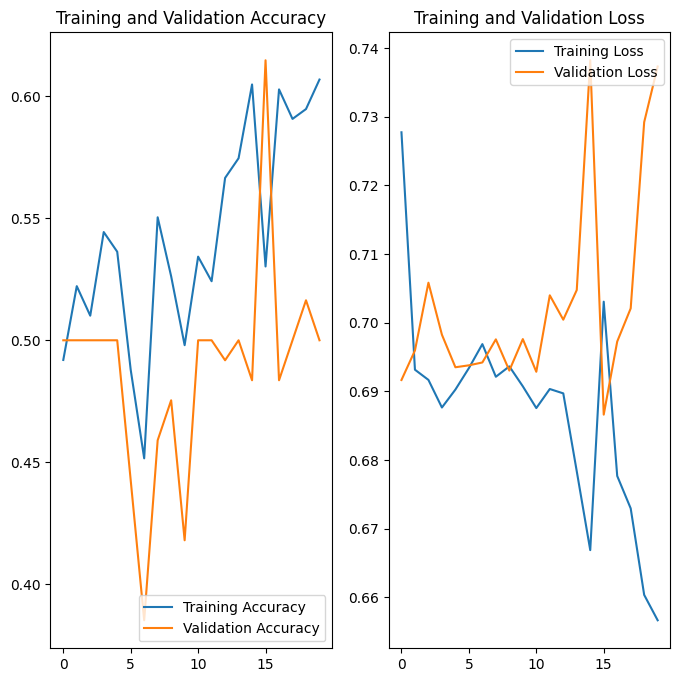

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Saving pake.png to pake (2).png
1/1 [==============================] - 0s 124ms/step




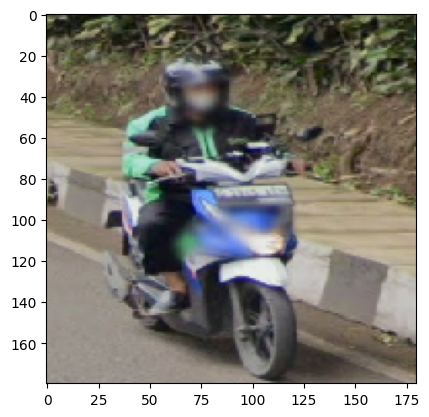

Foto ini berkemungkinan 43.78% pengendara_pakai_helm and 56.22% pengendara_tidak_pakai_helm.




In [26]:
# image_baru_url = "https://assets.kompasiana.com/items/album/2019/01/14/berbahaya-20170505-230401-5c3c21a2c112fe71426695a7.jpeg"
# image_baru_path = tf.keras.utils.get_file('gapakehelm', origin=image_baru_url)
# image_baru_path = "/content/gapakehelm.jpg"
# img = tf.keras.utils.load_img(
#    image_baru_path, target_size=(image_height, image_width)
# )
# plt.imshow(img)

def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, image_width, image_height, 3])

  predict_proba = model.predict(im_input)[0]
  # predict_class = np.argmax(model.predict(im_input)[0])

  # if predict_class == 0:
  #     predict_label = 'pengendara_pakai_helm'
  # elif predict_class == 1:
  #     predict_label = 'pengendara_tidak_pakai_helm'

  print('\n')
  plt.show()
  # print("\nImag)
  prediction_text = "Foto ini berkemungkinan {:.2f}% pengendara_pakai_helm and {:.2f}% pengendara_tidak_pakai_helm.".format(100 * predict_proba[0], 100 * (1 - predict_proba[0]))
  print(prediction_text)

  # print("Probability: ", predict_proba, "%")
  # print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

from google.colab import files
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(image_width,image_height))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

Hasil pada model kali ini tidak memiliki perubahan yang signifikan dan prediksi gambarnya masih kurang tepat.

Saving testdulu.jpg to testdulu.jpg
1/1 [==============================] - 0s 27ms/step




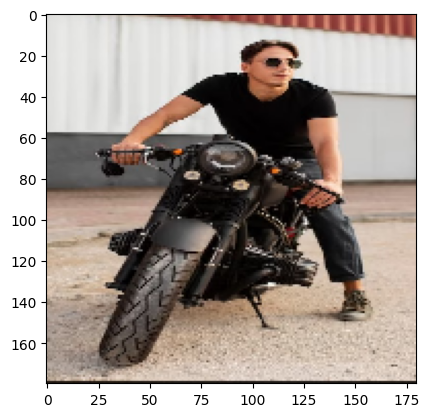

Foto ini berkemungkinan 1.72% pengendara_pakai_helm and 98.28% pengendara_tidak_pakai_helm.




In [27]:
# image_baru_url = "https://assets.kompasiana.com/items/album/2019/01/14/berbahaya-20170505-230401-5c3c21a2c112fe71426695a7.jpeg"
# image_baru_path = tf.keras.utils.get_file('gapakehelm', origin=image_baru_url)
# image_baru_path = "/content/gapakehelm.jpg"
# img = tf.keras.utils.load_img(
#    image_baru_path, target_size=(image_height, image_width)
# )
# plt.imshow(img)

def predict_image(image_upload, model = model):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, image_width, image_height, 3])

  predict_proba = model.predict(im_input)[0]
  # predict_class = np.argmax(model.predict(im_input)[0])

  # if predict_class == 0:
  #     predict_label = 'pengendara_pakai_helm'
  # elif predict_class == 1:
  #     predict_label = 'pengendara_tidak_pakai_helm'

  print('\n')
  plt.show()
  # print("\nImag)
  prediction_text = "Foto ini berkemungkinan {:.2f}% pengendara_pakai_helm and {:.2f}% pengendara_tidak_pakai_helm.".format(100 * predict_proba[0], 100 * (1 - predict_proba[0]))
  print(prediction_text)

  # print("Probability: ", predict_proba, "%")
  # print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

from google.colab import files
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(image_width,image_height))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

Ketika mencoba gambar lain, hasil prediksinya tepat.

Hal ini kemungkinan terjadi karena masih tingginya val loss dan rendahnya val accuracy yang berarti masih overfitting. Untuk memperbaikinya dapat menambahkan data yang lebih banyak.